## In this file we will use the KeplerMapper python class with a one-variable filter

Importing Kepler mapper class

In [1]:
import km

Imporing Libraries and data-set

In [31]:
import pandas as pd
import numpy as np

# import libraries for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import pylab

#import libraries for features decomposition
import sklearn as sk
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

#Visualization param
pd.options.display.max_columns = None
pd.options.display.max_rows = None

df = pd.read_csv('../../Data/NBA-data-With-Positions.csv')
positions = df['PosicAbbrev']

Performing PCA over the features previously chosen

In [40]:
# selecting features
chosen_features = ['REB','AST','TOV','STL','BLK','PF','PTS']
df = df[chosen_features]

# converting positions into numbers (only useful for plotting)
dict = {' PG': 1, ' PF': 2, ' SG' : 3, ' SF' : 4, ' C' : 5}
invdict = {v: k for k, v in dict.iteritems()}

position_labels = [dict[x] for x in positions]

/usr/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


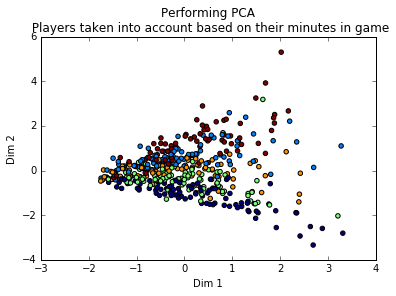

In [38]:
df_scaled = sk.preprocessing.scale(df)
pca = sk.decomposition.PCA(n_components=2, whiten=True)
df_red = pca.fit_transform(df_scaled) # the transformed dataset

statesN = [1,2,3,4,5]
states = [invdict[x] for x in statesN]
states

import matplotlib.patches as mpatches
pylab.title("Performing PCA\n Players taken into account based on their minutes in game")
pylab.xlabel("Dim 1")
pylab.ylabel("Dim 2")
pylab.scatter(df_red[:, 0], df_red[:, 1], c=position_labels)
pylab.legend(loc='upper center', bbox_to_anchor=(1.05, .4) ,scatterpoints = 1)
pylab.show()

Concatenating <code>df</code> and <code>filter function</code> (which is <code>[Dim1,Dim2]</code> in our case) in order to apply the mapper algorithm

In [61]:
filterDim1 = pd.Series(df_red[:,0], name='Dim1')
filterDim2 = pd.Series(df_red[:,1], name='Dim2')
df_withFilter = pd.concat([df,filterDim1,filterDim2],axis=1)
print df_withFilter 
df_withFilter = df_withFilter.as_matrix()

      REB   AST  TOV  STL  BLK   PF   PTS      Dim1      Dim2
0     1.5   2.6  1.2  0.4  0.1  1.9   7.1 -0.269607 -0.680237
1     6.5   1.6  0.8  0.8  0.7  2.0   9.2  0.334961  0.884298
2     0.7   0.1  0.2  0.3  0.0  0.5   0.9 -1.497518 -0.360268
3     2.1   0.6  0.7  0.3  0.2  1.5   2.5 -0.844540  0.091718
4     7.3   3.2  1.3  0.8  1.5  2.0  15.2  1.127314  1.346737
5     6.4   1.5  0.7  0.6  0.9  2.5  12.0  0.487479  1.329754
6     6.1   1.7  1.5  0.9  0.6  2.1  10.2  0.581722  0.477081
7     2.1   1.1  0.2  0.3  0.1  1.9   5.0 -0.763674  0.067775
8     3.8   0.5  0.6  0.4  0.5  1.5   2.9 -0.615131  0.683414
9     3.5   2.0  1.6  0.6  0.1  2.3  13.3  0.343102 -0.426166
10    7.6   1.2  1.9  0.5  0.8  2.9   9.0  0.787821  1.360738
11    3.5   0.3  0.0  0.1  0.6  1.5   2.8 -0.925590  1.087748
12    4.6   0.5  0.9  0.3  0.6  2.3   6.0 -0.175806  1.059727
13    2.7   1.2  0.8  0.8  0.2  2.4  10.3  0.018926 -0.078456
14    3.4   1.0  0.8  0.9  0.2  2.3   4.5 -0.144731  0.084983
15    4.

Using keplermapper

In [66]:
# Initialize
mapper = km.KeplerMapper(verbose=2)

# Fit to and transform the data
projected_data = mapper.fit_transform(df_withFilter, projection=[7,8]) # filter column

# Create dictionary called 'complex' with nodes, edges and meta-information
complex = mapper.map(projected_data, df_withFilter[:,:7], nr_cubes=10,overlap_perc=.5)

# Visualize it
mapper.visualize(complex, path_html="NBA_keplermapper_svds_output.html", 
                 title="Mapper_on_NBA_data")


..Projecting data using: [7, 8]

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))

Mapping on data shaped (476, 2) using dimensions

Creating 1000 hypercubes.
There are 0 points in cube_0 / 1000 with starting range [ 0.  0.]
Cube_0 is empty.

There are 0 points in cube_1 / 1000 with starting range [ 0.   0.1]
Cube_1 is empty.

There are 32 points in cube_2 / 1000 with starting range [ 0.   0.2]
Found 2 clusters in cube_2

There are 73 points in cube_3 / 1000 with starting range [ 0.   0.3]
Found 5 clusters in cube_3

There are 14 points in cube_4 / 1000 with starting range [ 0.   0.4]
Found 0 clusters in cube_4

There are 0 points in cube_5 / 1000 with starting range [ 0.   0.5]
Cube_5 is empty.

There are 0 points in cube_6 / 1000 with starting range [ 0.   0.6]
Cube_6 is empty.

There are 0 points in cube_7 / 1000 with starting range [ 0.   0.7]
Cube_7 is empty.

There are 0 points in cube_8 / 1000 with starting range [ 0.   0.8]
Cube_8 is empty.

There are 0 points in 